# EDA (Time-Series Thinking)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(
    "../data/processed/hourly_energy.csv",
    parse_dates=["datetime"],
    index_col="datetime"
)

df.head()

,Global_active_power
datetime,
2006-12-16 17:00:00,4.2229
2006-12-16 18:00:00,3.6322
2006-12-16 19:00:00,3.4002
2006-12-16 20:00:00,3.2686
2006-12-16 21:00:00,3.0565


### Global Overview Plot

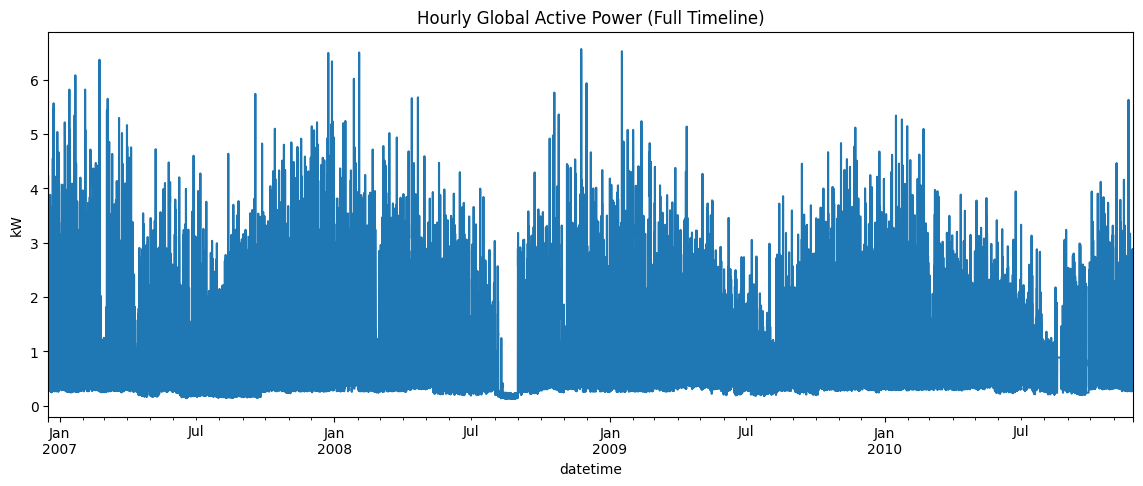

In [2]:
plt.figure(figsize=(14,5))
df["Global_active_power"].plot()
plt.title("Hourly Global Active Power (Full Timeline)")
plt.ylabel("kW")
plt.show()

### Daily Pattern (Intra-Day Seasonality)

In [3]:
# add hour feature
df["hour"] = df.index.hour

In [4]:
# compute average power per hour
hourly_pattern = df.groupby("hour")["Global_active_power"].mean()

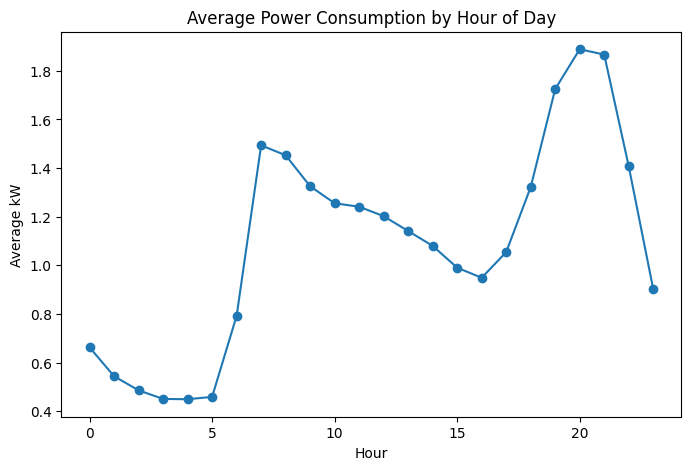

In [5]:
# plor hourly pattern 
plt.figure(figsize=(8,5))
hourly_pattern.plot(marker='o')
plt.title("Average Power Consumption by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average kW")
plt.show()

### Weekly Pattern

In [6]:
# adding day of week 
df["dayofweek"] = df.index.dayofweek

In [7]:
# compute average per day 
weekly_pattern = df.groupby("dayofweek")["Global_active_power"].mean()

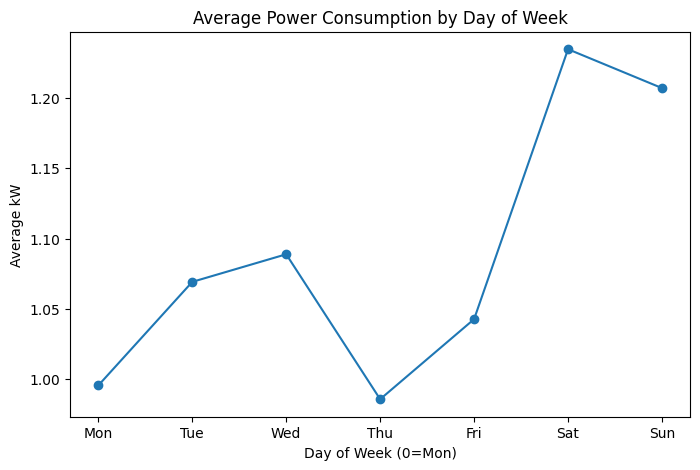

In [8]:
# plotting weekly pattern 
plt.figure(figsize=(8,5))
day_map = {
    0: "Mon", 1: "Tue", 2: "Wed",
    3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"
}

weekly_pattern.index = weekly_pattern.index.map(day_map)
weekly_pattern.plot(marker='o')
plt.title("Average Power Consumption by Day of Week")
plt.xlabel("Day of Week (0=Mon)")
plt.ylabel("Average kW")
plt.show()


### Monthly Pattern

In [9]:
# adding month
df["month"] = df.index.month

In [10]:
# compute average per month
monthly_pattern = df.groupby("month")["Global_active_power"].mean()

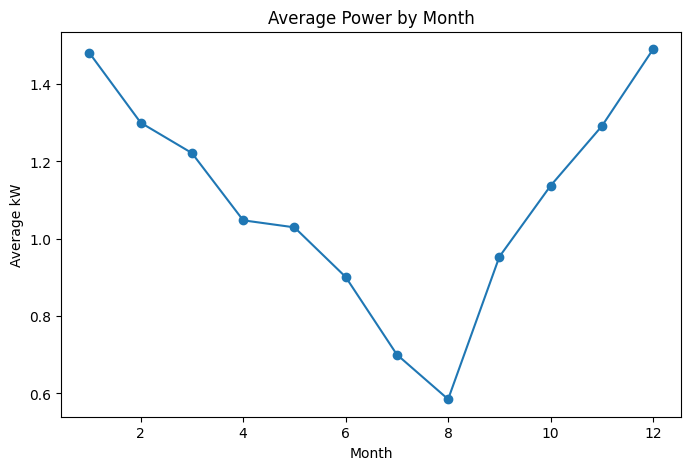

In [11]:
# plotting monthly pattern
plt.figure(figsize=(8,5))
monthly_pattern.plot(marker='o')
plt.title("Average Power by Month")
plt.xlabel("Month")
plt.ylabel("Average kW")
plt.show()

### Long-Term Trend

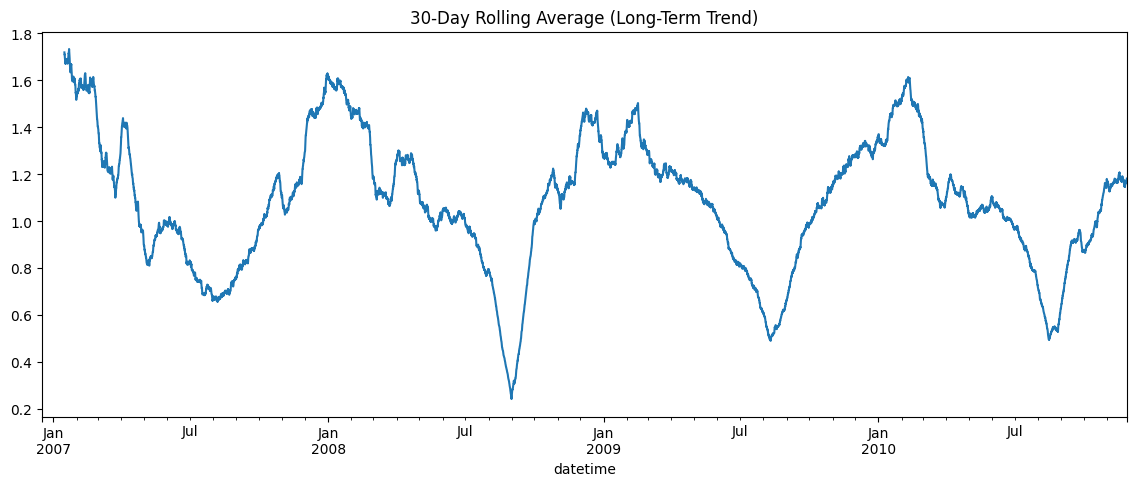

In [12]:
rolling_trend = df["Global_active_power"].rolling(window=24*30).mean()

plt.figure(figsize=(14,5))
rolling_trend.plot()
plt.title("30-Day Rolling Average (Long-Term Trend)")
plt.show()

### Identify Peak Hours Precisely

In [13]:
hourly_pattern.sort_values(ascending=False).head()

hour
20    1.888794
21    1.866709
19    1.724872
7     1.493463
8     1.452574
Name: Global_active_power, dtype: float64

## Key Observations

* The dataset exhibits strong daily seasonality, with energy consumption lowest during early morning hours (approximately 2AM–5AM) and peaking in the evening between 7PM–9PM. The highest average consumption occurs around 8PM, followed closely by 9PM and 7PM.

* A secondary increase in consumption is observed in the morning around 7AM–8AM, likely corresponding to typical household activity patterns.

* Weekly analysis shows higher average consumption during weekends, particularly on Saturday and Sunday, compared to most weekdays. Thursday appears to have the lowest average consumption among the week.

* Monthly patterns indicate clear seasonal variation. Consumption is highest during winter months (December–January) and lowest during late summer (around July–August), suggesting temperature-driven usage such as heating.

* The 30-day rolling average confirms a recurring yearly cycle, with noticeable seasonal fluctuations but no strong long-term upward or downward structural trend across the four-year period.

* Overall, daily seasonality appears to be the strongest and most consistent pattern in the dataset, followed by yearly seasonal variation.
